In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Healthcare Providers.csv")

In [3]:
df

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3837311,1386938868,PAPES,JOAN,NaN,PT,F,I,324 E BALTIMORE ST,NaN,...,97162,"Evaluation of physical therapy, typically 30 m...",N,20,20,20,85.3725,214,60.7255,62.2485
99996,2079360,1215091327,HAYNER,MARGARET,S,ARNP,F,I,645 NW 4TH ST,NaN,...,99213,Established patient office or other outpatient...,N,136,107,136,61.27,144.05147059,30.006176471,37.040220588
99997,8927965,1902868185,VALENCIA,DANA,NaN,M.D.,M,I,3009 N BALLAS RD,SUITE 202B,...,93320,"Doppler ultrasound study of heart blood flow, ...",N,11,11,11,17.98,109.54545455,14.09,14.62
99998,8854571,1891941183,GONZALEZ-LAMOS,RAFAELA,NaN,NaN,F,I,2365 BOSTON POST RD,SUITE 201,...,G0008,Administration of influenza virus vaccine,N,12,12,12,30.54,65,29.93,25.32


# Nominal Encoding

In [7]:
df['Gender of the Provider']

0        F
1        F
2        M
3        M
4        M
        ..
99995    F
99996    F
99997    M
99998    F
99999    F
Name: Gender of the Provider, Length: 100000, dtype: object

In [9]:
len(df['Gender of the Provider'].unique())

3

In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
ohe=OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')

In [15]:
ohe

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [17]:
ohe_transformed=ohe.fit_transform(df[['Gender of the Provider']])

In [19]:
ohe_transformed

,Gender of the Provider_F,Gender of the Provider_M,Gender of the Provider_nan
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
99995,1.0,0.0,0.0
99996,1.0,0.0,0.0
99997,0.0,1.0,0.0
99998,1.0,0.0,0.0


In [21]:
df=pd.concat([df,ohe_transformed],axis=1).drop(columns=['Gender of the Provider'])

In [23]:
df

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,City of the Provider,...,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Gender of the Provider_F,Gender of the Provider_M,Gender of the Provider_nan
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,I,1402 S GRAND BLVD,FDT 14TH FLOOR,SAINT LOUIS,...,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889,1.0,0.0,0.0
1,3354385,1346202256,JONES,WENDY,P,M.D.,I,2950 VILLAGE DR,NaN,FAYETTEVILLE,...,175,175,175,123.73,548.8,118.83,135.31525714,1.0,0.0,0.0
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,I,20 WASHINGTON AVE,STE 212,NORTH HAVEN,...,32,13,32,90.65,155,64.4396875,60.5959375,0.0,1.0,0.0
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,I,5746 N BROADWAY ST,NaN,KANSAS CITY,...,20,18,20,3.5,5,3.43,3.43,0.0,1.0,0.0
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,I,875 MILITARY TRL,SUITE 200,JUPITER,...,33,24,31,26.52,40,19.539393939,19.057575758,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3837311,1386938868,PAPES,JOAN,NaN,PT,I,324 E BALTIMORE ST,NaN,WILMINGTON,...,20,20,20,85.3725,214,60.7255,62.2485,1.0,0.0,0.0
99996,2079360,1215091327,HAYNER,MARGARET,S,ARNP,I,645 NW 4TH ST,NaN,REDMOND,...,136,107,136,61.27,144.05147059,30.006176471,37.040220588,1.0,0.0,0.0
99997,8927965,1902868185,VALENCIA,DANA,NaN,M.D.,I,3009 N BALLAS RD,SUITE 202B,SAINT LOUIS,...,11,11,11,17.98,109.54545455,14.09,14.62,0.0,1.0,0.0
99998,8854571,1891941183,GONZALEZ-LAMOS,RAFAELA,NaN,NaN,I,2365 BOSTON POST RD,SUITE 201,LARCHMONT,...,12,12,12,30.54,65,29.93,25.32,1.0,0.0,0.0


# Ordinal Encoding

In [25]:
from sklearn.preprocessing import OrdinalEncoder

In [27]:
df['Place of Service'].unique()

array(['F', 'O'], dtype=object)

In [29]:
order=['F','O']

In [31]:
enc=OrdinalEncoder(categories=[order])

In [33]:
df['Place of Service']=enc.fit_transform(df[['Place of Service']])

In [35]:
df

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,City of the Provider,...,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Gender of the Provider_F,Gender of the Provider_M,Gender of the Provider_nan
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,I,1402 S GRAND BLVD,FDT 14TH FLOOR,SAINT LOUIS,...,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889,1.0,0.0,0.0
1,3354385,1346202256,JONES,WENDY,P,M.D.,I,2950 VILLAGE DR,NaN,FAYETTEVILLE,...,175,175,175,123.73,548.8,118.83,135.31525714,1.0,0.0,0.0
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,I,20 WASHINGTON AVE,STE 212,NORTH HAVEN,...,32,13,32,90.65,155,64.4396875,60.5959375,0.0,1.0,0.0
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,I,5746 N BROADWAY ST,NaN,KANSAS CITY,...,20,18,20,3.5,5,3.43,3.43,0.0,1.0,0.0
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,I,875 MILITARY TRL,SUITE 200,JUPITER,...,33,24,31,26.52,40,19.539393939,19.057575758,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3837311,1386938868,PAPES,JOAN,NaN,PT,I,324 E BALTIMORE ST,NaN,WILMINGTON,...,20,20,20,85.3725,214,60.7255,62.2485,1.0,0.0,0.0
99996,2079360,1215091327,HAYNER,MARGARET,S,ARNP,I,645 NW 4TH ST,NaN,REDMOND,...,136,107,136,61.27,144.05147059,30.006176471,37.040220588,1.0,0.0,0.0
99997,8927965,1902868185,VALENCIA,DANA,NaN,M.D.,I,3009 N BALLAS RD,SUITE 202B,SAINT LOUIS,...,11,11,11,17.98,109.54545455,14.09,14.62,0.0,1.0,0.0
99998,8854571,1891941183,GONZALEZ-LAMOS,RAFAELA,NaN,NaN,I,2365 BOSTON POST RD,SUITE 201,LARCHMONT,...,12,12,12,30.54,65,29.93,25.32,1.0,0.0,0.0


<Axes: xlabel='Place of Service'>

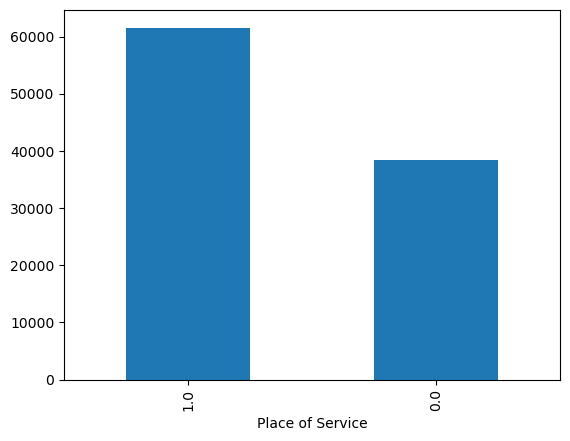

In [37]:
df['Place of Service'].value_counts().plot(kind='bar')

<Axes: xlabel='State Code of the Provider'>

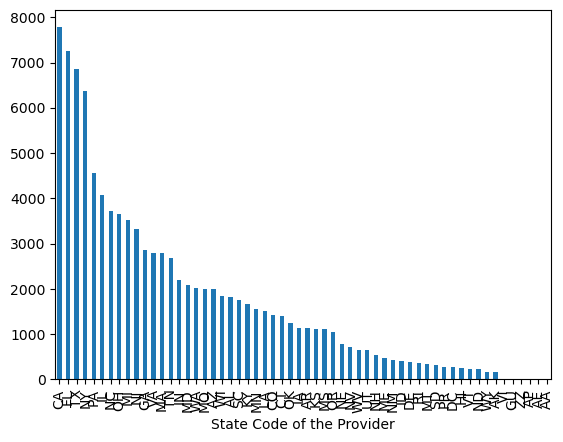

In [39]:
df['State Code of the Provider'].value_counts().plot(kind='bar')

In [41]:
freq_map=df['State Code of the Provider'].value_counts()

In [43]:
df['State Code of the Provider_frq']=df['State Code of the Provider'].map(freq_map).drop(columns=['State Code of the Provider'])

In [45]:
df

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,City of the Provider,...,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Gender of the Provider_F,Gender of the Provider_M,Gender of the Provider_nan,State Code of the Provider_frq
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,I,1402 S GRAND BLVD,FDT 14TH FLOOR,SAINT LOUIS,...,24,27,200.58777778,305.21111111,157.26222222,160.90888889,1.0,0.0,0.0,1997
1,3354385,1346202256,JONES,WENDY,P,M.D.,I,2950 VILLAGE DR,NaN,FAYETTEVILLE,...,175,175,123.73,548.8,118.83,135.31525714,1.0,0.0,0.0,3725
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,I,20 WASHINGTON AVE,STE 212,NORTH HAVEN,...,13,32,90.65,155,64.4396875,60.5959375,0.0,1.0,0.0,1403
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,I,5746 N BROADWAY ST,NaN,KANSAS CITY,...,18,20,3.5,5,3.43,3.43,0.0,1.0,0.0,1997
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,I,875 MILITARY TRL,SUITE 200,JUPITER,...,24,31,26.52,40,19.539393939,19.057575758,0.0,1.0,0.0,7263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3837311,1386938868,PAPES,JOAN,NaN,PT,I,324 E BALTIMORE ST,NaN,WILMINGTON,...,20,20,85.3725,214,60.7255,62.2485,1.0,0.0,0.0,4073
99996,2079360,1215091327,HAYNER,MARGARET,S,ARNP,I,645 NW 4TH ST,NaN,REDMOND,...,107,136,61.27,144.05147059,30.006176471,37.040220588,1.0,0.0,0.0,1046
99997,8927965,1902868185,VALENCIA,DANA,NaN,M.D.,I,3009 N BALLAS RD,SUITE 202B,SAINT LOUIS,...,11,11,17.98,109.54545455,14.09,14.62,0.0,1.0,0.0,1997
99998,8854571,1891941183,GONZALEZ-LAMOS,RAFAELA,NaN,NaN,I,2365 BOSTON POST RD,SUITE 201,LARCHMONT,...,12,12,30.54,65,29.93,25.32,1.0,0.0,0.0,6361


In [47]:
df10=pd.read_csv('Healthcare Providers.csv')

In [49]:
df10

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3837311,1386938868,PAPES,JOAN,NaN,PT,F,I,324 E BALTIMORE ST,NaN,...,97162,"Evaluation of physical therapy, typically 30 m...",N,20,20,20,85.3725,214,60.7255,62.2485
99996,2079360,1215091327,HAYNER,MARGARET,S,ARNP,F,I,645 NW 4TH ST,NaN,...,99213,Established patient office or other outpatient...,N,136,107,136,61.27,144.05147059,30.006176471,37.040220588
99997,8927965,1902868185,VALENCIA,DANA,NaN,M.D.,M,I,3009 N BALLAS RD,SUITE 202B,...,93320,"Doppler ultrasound study of heart blood flow, ...",N,11,11,11,17.98,109.54545455,14.09,14.62
99998,8854571,1891941183,GONZALEZ-LAMOS,RAFAELA,NaN,NaN,F,I,2365 BOSTON POST RD,SUITE 201,...,G0008,Administration of influenza virus vaccine,N,12,12,12,30.54,65,29.93,25.32


In [51]:
df10.describe()

,index,National Provider Identifier,Zip Code of the Provider
count,1.000000e+05,1.000000e+05,1.000000e+05
mean,4.907646e+06,1.498227e+09,4.163820e+08
std,2.839633e+06,2.874125e+08,3.082566e+08
min,2.090000e+02,1.003001e+09,6.010000e+02
25%,2.458791e+06,1.245669e+09,1.426300e+08
50%,4.901266e+06,1.497847e+09,3.633025e+08
75%,7.349450e+06,1.740374e+09,6.819881e+08
max,9.847440e+06,1.993000e+09,9.990166e+08


In [53]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [55]:
scaler=MinMaxScaler(feature_range=(0,1))

In [57]:
df10['Zip Code of the Provider_scaled']=scaler.fit_transform(df10[['Zip Code of the Provider']])

In [59]:
df10.describe()

,index,National Provider Identifier,Zip Code of the Provider,Zip Code of the Provider_scaled
count,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000
mean,4.907646e+06,1.498227e+09,4.163820e+08,0.416791
std,2.839633e+06,2.874125e+08,3.082566e+08,0.308560
min,2.090000e+02,1.003001e+09,6.010000e+02,0.000000
25%,2.458791e+06,1.245669e+09,1.426300e+08,0.142770
50%,4.901266e+06,1.497847e+09,3.633025e+08,0.363660
75%,7.349450e+06,1.740374e+09,6.819881e+08,0.682659
max,9.847440e+06,1.993000e+09,9.990166e+08,1.000000


In [61]:
std_scaler=StandardScaler()

In [63]:
df10['National Provider Identifier_std_scale']=std_scaler.fit_transform(df10[['National Provider Identifier']])

In [65]:
df10.describe().round(2)

,index,National Provider Identifier,Zip Code of the Provider,Zip Code of the Provider_scaled,National Provider Identifier_std_scale
count,100000.00,1.000000e+05,1.000000e+05,100000.00,100000.00
mean,4907645.75,1.498227e+09,4.163820e+08,0.42,0.00
std,2839632.70,2.874125e+08,3.082566e+08,0.31,1.00
min,209.00,1.003001e+09,6.010000e+02,0.00,-1.72
25%,2458790.75,1.245669e+09,1.426300e+08,0.14,-0.88
50%,4901266.00,1.497847e+09,3.633025e+08,0.36,-0.00
75%,7349450.50,1.740374e+09,6.819881e+08,0.68,0.84
max,9847440.00,1.993000e+09,9.990166e+08,1.00,1.72


In [67]:
import matplotlib.pyplot as plt

(array([10100.,  9887., 10202., 10097.,  9958.,  9065., 10052., 10954.,
         9782.,  9903.]),
 array([1.00300130e+09, 1.10200116e+09, 1.20100101e+09, 1.30000087e+09,
        1.39900073e+09, 1.49800059e+09, 1.59700044e+09, 1.69600030e+09,
        1.79500016e+09, 1.89400002e+09, 1.99299987e+09]),
 <BarContainer object of 10 artists>)

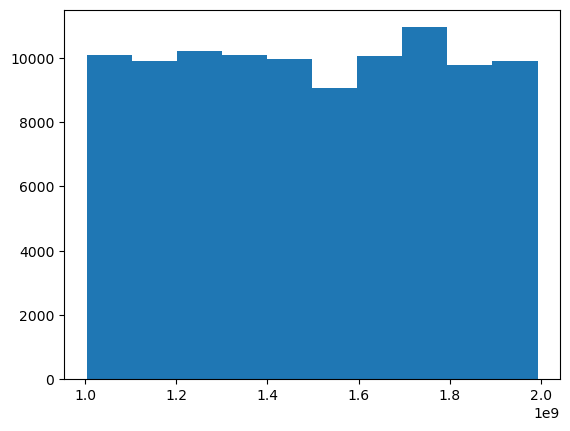

In [69]:
plt.hist(df10['National Provider Identifier'])

(array([10100.,  9887., 10202., 10097.,  9958.,  9065., 10052., 10954.,
         9782.,  9903.]),
 array([-1.72305667e+00, -1.37860279e+00, -1.03414891e+00, -6.89695035e-01,
        -3.45241156e-01, -7.87276730e-04,  3.43666602e-01,  6.88120481e-01,
         1.03257436e+00,  1.37702824e+00,  1.72148212e+00]),
 <BarContainer object of 10 artists>)

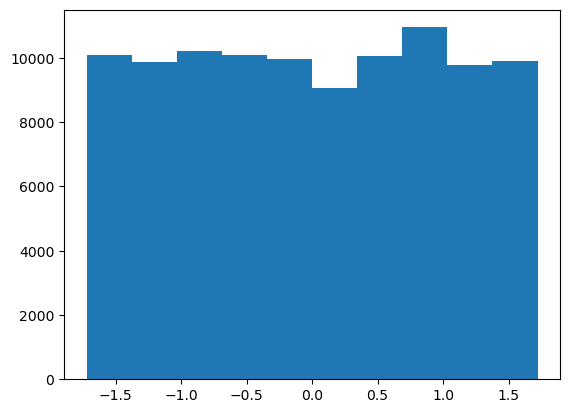

In [71]:
plt.hist(df10['National Provider Identifier_std_scale'])

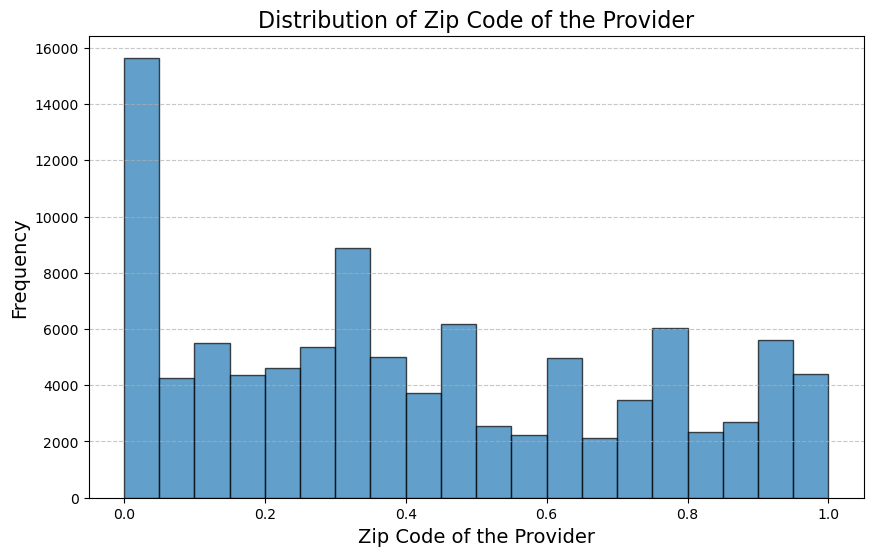

In [73]:
import matplotlib.pyplot as plt

# Data for the histogram
data = df10['Zip Code of the Provider_scaled']

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Zip Code of the Provider', fontsize=16)
plt.xlabel('Zip Code of the Provider', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

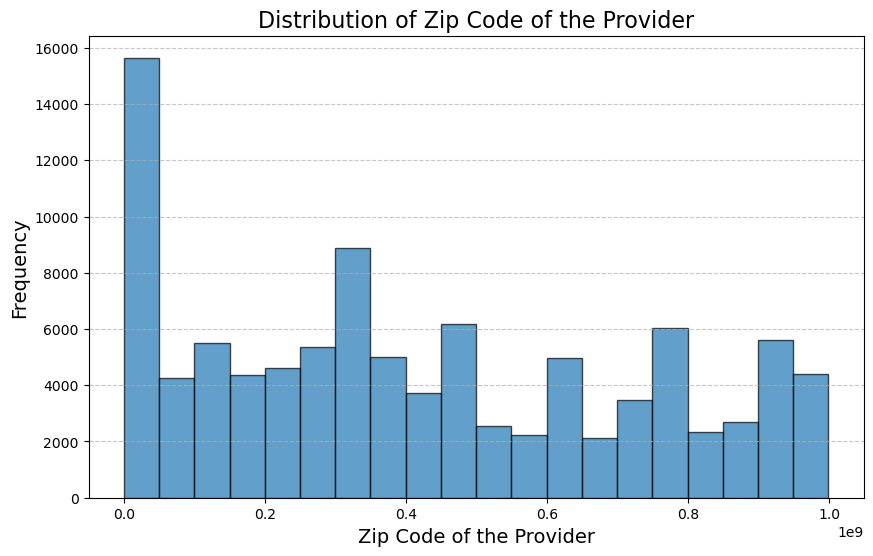

In [75]:
import matplotlib.pyplot as plt

# Data for the histogram
data = df10['Zip Code of the Provider']

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Zip Code of the Provider', fontsize=16)
plt.xlabel('Zip Code of the Provider', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [138]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

In [140]:
data=pd.read_csv("Healthcare Providers.csv")

In [144]:
data

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3837311,1386938868,PAPES,JOAN,NaN,PT,F,I,324 E BALTIMORE ST,NaN,...,97162,"Evaluation of physical therapy, typically 30 m...",N,20,20,20,85.3725,214,60.7255,62.2485
99996,2079360,1215091327,HAYNER,MARGARET,S,ARNP,F,I,645 NW 4TH ST,NaN,...,99213,Established patient office or other outpatient...,N,136,107,136,61.27,144.05147059,30.006176471,37.040220588
99997,8927965,1902868185,VALENCIA,DANA,NaN,M.D.,M,I,3009 N BALLAS RD,SUITE 202B,...,93320,"Doppler ultrasound study of heart blood flow, ...",N,11,11,11,17.98,109.54545455,14.09,14.62
99998,8854571,1891941183,GONZALEZ-LAMOS,RAFAELA,NaN,NaN,F,I,2365 BOSTON POST RD,SUITE 201,...,G0008,Administration of influenza virus vaccine,N,12,12,12,30.54,65,29.93,25.32


# Preprocessing Pipeline

In [146]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import  make_pipeline

In [148]:
data = data.drop(columns=['index', 'National Provider Identifier', 
                      'Last Name/Organization Name of the Provider',
                      'First Name of the Provider', 'Middle Initial of the Provider',
                      'Street Address 1 of the Provider', 'Street Address 2 of the Provider',
                      'Zip Code of the Provider', 'HCPCS Code'])

In [150]:
data

,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,M.D.,F,I,SAINT LOUIS,MO,US,Internal Medicine,Y,F,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,M.D.,F,I,FAYETTEVILLE,NC,US,Obstetrics & Gynecology,Y,O,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,DPM,M,I,NORTH HAVEN,CT,US,Podiatry,Y,O,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,MD,M,I,KANSAS CITY,MO,US,Internal Medicine,Y,O,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,DO,M,I,JUPITER,FL,US,Internal Medicine,Y,O,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,PT,F,I,WILMINGTON,IL,US,Physical Therapist in Private Practice,Y,O,"Evaluation of physical therapy, typically 30 m...",N,20,20,20,85.3725,214,60.7255,62.2485
99996,ARNP,F,I,REDMOND,OR,US,Nurse Practitioner,Y,O,Established patient office or other outpatient...,N,136,107,136,61.27,144.05147059,30.006176471,37.040220588
99997,M.D.,M,I,SAINT LOUIS,MO,US,Cardiology,Y,F,"Doppler ultrasound study of heart blood flow, ...",N,11,11,11,17.98,109.54545455,14.09,14.62
99998,NaN,F,I,LARCHMONT,NY,US,Internal Medicine,Y,O,Administration of influenza virus vaccine,N,12,12,12,30.54,65,29.93,25.32


In [152]:
min_max_features=['Number of Services']
standardize_features=['Average Medicare Allowed Amount']
ordinal_feautures=['HCPCS Drug Indicator','Medicare Participation Indicator','Gender of the Provider']
nominal_features=['City of the Provider','State Code of the Provider','Provider Type']

In [154]:
ordinal_categories = [
    ['N', 'Y'], # HCPCS Drug Indicator: No (0), Yes (1)
    ['N', 'Y'],# Medicare Participation Indicator: No (0), Yes (1)
    ['F', 'M']# Gender of the Provider: Female (0), Male (1)
]

In [156]:
min_max_transformers=make_pipeline(MinMaxScaler())
standard_transformer=make_pipeline(StandardScaler())
ordina_transformer=make_pipeline(OrdinalEncoder(categories=ordinal_categories))
nominal_transformer=make_pipeline(OneHotEncoder(sparse_output=False))

In [158]:
preprocessor=ColumnTransformer(transformers=[
    ('min_max',min_max_transformers,min_max_features),
    ('standard',standard_transformer,standardize_features),
    ('ord',ordina_transformer,ordinal_feautures),
    ('nom',nominal_transformer,nominal_features)
],remainder='passthrough',verbose_feature_names_out=False,force_int_remainder_cols=False)

In [164]:
preprocessor.set_output(transform='pandas')

ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                  transformers=[('min_max',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['Number of Services']),
                                ('standard',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['Average Medicare Allowed Amount']),
                                ('ord',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['N',
                                                                              'Y'],
                                                                             ['N',
                                                                              'Y'],
                                                                             ['F',
                                                                              'M']]))]),
                                 ['HCPCS Drug Indicator',
                                  'Medicare Participation Indicator',
                                  'Gender of the Provider']),
                                ('nom',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['City of the Provider',
                                  'State Code of the Provider',
                                  'Provider Type'])],
                  verbose_feature_names_out=False)